In [10]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [11]:
h=1
sd=1
n=50
def gen_data(n,h,sd1,sd2):
    x1 = ss.norm.rvs(-h,sd1,n)
    y1 = ss.norm.rvs(0,sd1,n)
    x2 = ss.norm.rvs(h,sd2,n)
    y2 = ss.norm.rvs(0,sd2,n)
    return (x1,y1,x2,y2)


In [12]:
(x1,y1,x2,y2) = gen_data(n,h,1,1.5)

In [32]:
(x1,y1,x2,y2) = gen_data(1000,1.5,1,1.5)

In [33]:
def plotdata(x1,y1,x2,y2):
    plt.figure()
    plt.plot(x1,y1,"o",ms=2)
    plt.plot(x2,y2,"o",ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.savefig("ClassfiedData.pdf")

<IPython.core.display.Javascript object>


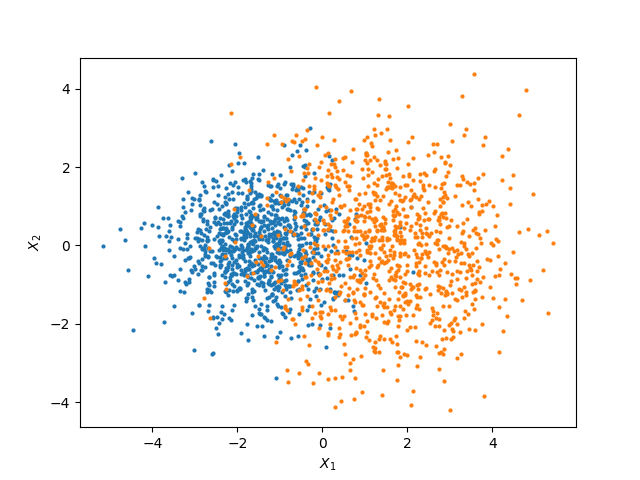

In [34]:
plotdata(x1,y1,x2,y2)

In [39]:
##### Logistic regression 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
X=np.vstack( (np.vstack((x1,y1)).T,np.vstack((x2,y2)).T) )

In [40]:
X.shape

(2000, 2)

In [46]:
n=1000
y=np.hstack((np.repeat(1,n),np.repeat(2,n)))

In [47]:
y.shape

(2000,)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5,random_state=1)

In [55]:
clf.fit(X_train,y_train)

/home/yuvraj/local-py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
clf.score(X_test,y_test)

0.896

In [59]:
clf.predict_proba(np.array([-2,1]).reshape(1,-1))

array([[0.97063156, 0.02936844]])

In [60]:
clf.predict(np.array([-2,1]).reshape(1,-1))

array([1])

In [66]:
def PlotProbs(ax,slf,class_no):
    xx1,xx2 = np.meshgrid(np.arange(-5,5,0.1),np.arange(-5,5,0.1))
    probs = clf.predict_proba(np.stack( (xx1.ravel(),xx2.ravel()), axis=1))
    Z=probs[:,class_no]
    Z=Z.reshape(xx1.shape)
    CS = ax.contourf(xx1,xx2,Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

<IPython.core.display.Javascript object>


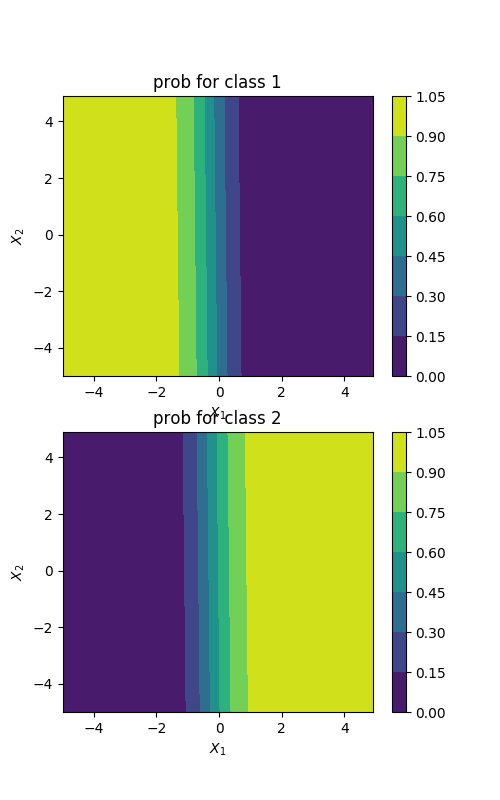

In [68]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
PlotProbs(ax,clf,0)
plt.title("prob for class 1")
plt.savefig("Prob_class1.pdf")
ax = plt.subplot(212)
PlotProbs(ax,clf,1)
plt.title("prob for class 2")
plt.savefig("Prob_class2.pdf")